In [1]:
#Import needed packages
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.decomposition import PCA
from sklearn import preprocessing
import scipy.stats as stats

In [62]:
from IPython.display import display # Allows the use of display() for DataFrames
import re

In [3]:
#notebook display
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

### Reading Dataset using Pandas

In [98]:
credit = pd.read_csv('default of credit card clients.csv', header =1, index_col=0)

### Explore raw dataset

In [5]:
credit.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [6]:
#Summarize Data
credit.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [7]:
#Check Variable Types
credit.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 1 to 30000
Data columns (total 24 columns):
LIMIT_BAL                     30000 non-null int64
SEX                           30000 non-null int64
EDUCATION                     30000 non-null int64
MARRIAGE                      30000 non-null int64
AGE                           30000 non-null int64
PAY_0                         30000 non-null int64
PAY_2                         30000 non-null int64
PAY_3                         30000 non-null int64
PAY_4                         30000 non-null int64
PAY_5                         30000 non-null int64
PAY_6                         30000 non-null int64
BILL_AMT1                     30000 non-null int64
BILL_AMT2                     30000 non-null int64
BILL_AMT3                     30000 non-null int64
BILL_AMT4                     30000 non-null int64
BILL_AMT5                     30000 non-null int64
BILL_AMT6                     30000 non-null int64
PAY_AMT1                

In [8]:
#Column Names
credit.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

### Pre-process data

In [99]:
#Rename PAY_0 to PAY_1; default payment next month to target
credit = credit.rename(index =str, columns={"PAY_0": "PAY_1"})
credit = credit.rename(index=str, columns={"default payment next month": "depvar"})

In [100]:
#Change values in MARRIAGE column 0 to become 3
credit.MARRIAGE[credit.MARRIAGE ==0] =3
credit.MARRIAGE.unique()

array([1, 2, 3])

In [101]:
#Change values in Education column 0, 5, 6 to become 4
credit.EDUCATION[credit.EDUCATION ==0] =4
credit.EDUCATION[credit.EDUCATION ==5] =4
credit.EDUCATION[credit.EDUCATION ==6] =4
credit.EDUCATION.unique()

array([2, 1, 3, 4])

In [102]:
print("Explanatory variables:  {}".format(len(credit.columns)-1))
print("Number of Observations: {}".format(credit.shape[0]))

Explanatory variables:  23
Number of Observations: 30000


## Exploratory Data Analysis


In [17]:
# number of men/women by education level
credit.groupby(['SEX', 'EDUCATION'])['SEX'].count()

SEX  EDUCATION
1    1            4354
     2            5374
     3            1990
     4             170
2    1            6231
     2            8656
     3            2927
     4             298
Name: SEX, dtype: int64

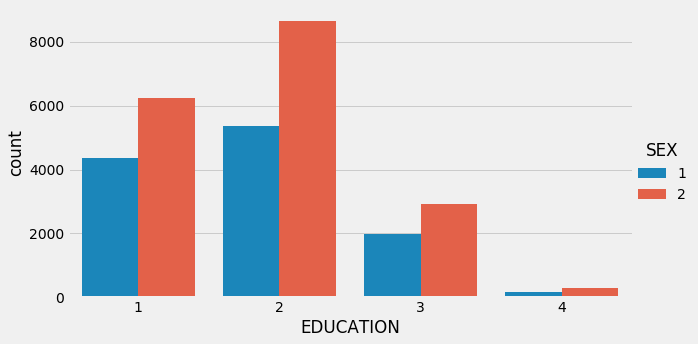

In [18]:
# plot sex/education status
ms = sns.catplot('EDUCATION', data=credit, hue= 'SEX', 
                    kind='count', aspect =1.75)
ms.set_xlabels('EDUCATION')

In [19]:
# number of men/women by marital status
credit.groupby(['SEX', 'MARRIAGE'])['SEX'].count()

SEX  MARRIAGE
1    1           5190
     2           6553
     3            145
2    1           8469
     2           9411
     3            232
Name: SEX, dtype: int64

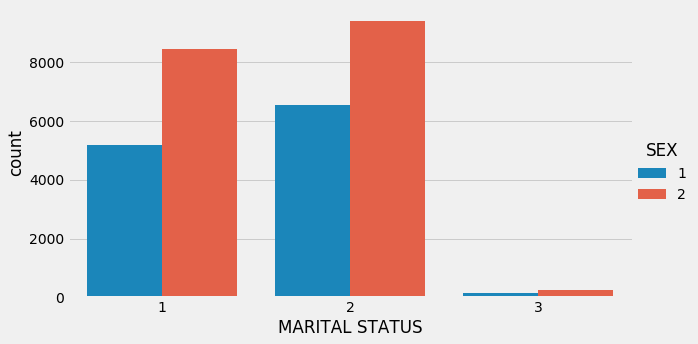

In [20]:
# plot sex/marital status
ms = sns.catplot('MARRIAGE', data=credit, hue= 'SEX', 
                    kind='count', aspect =1.75)
ms.set_xlabels('MARITAL STATUS')

In [21]:
# number of men/women by default 0=no default; 1=default
credit.groupby(['SEX', 'depvar'])['SEX'].count()

SEX  depvar
1    0          9015
     1          2873
2    0         14349
     1          3763
Name: SEX, dtype: int64

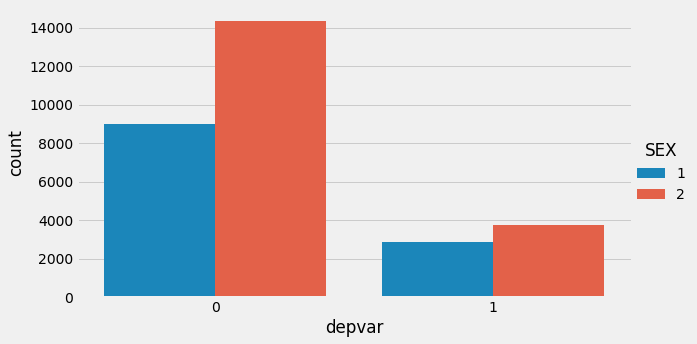

In [22]:
# plot sex/default rate status
ms = sns.catplot('depvar', data=credit, hue= 'SEX', 
                    kind='count', aspect =1.75)
ms.set_xlabels('depvar')

In [23]:
# number default by education level
credit.groupby(['depvar', 'EDUCATION'])['depvar'].count()

depvar  EDUCATION
0       1             8549
        2            10700
        3             3680
        4              435
1       1             2036
        2             3330
        3             1237
        4               33
Name: depvar, dtype: int64

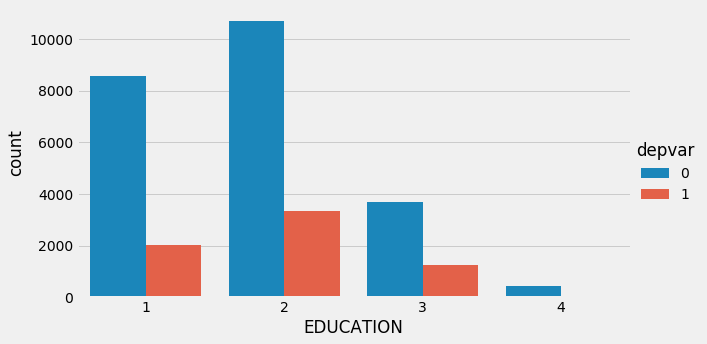

In [24]:
# plot education/default rate status
ms = sns.catplot('EDUCATION', data=credit, hue= 'depvar', 
                    kind='count', aspect =1.75)
ms.set_xlabels('EDUCATION')

In [27]:
#Dataframe column names
header = credit.dtypes.index
print(header)

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'depvar'],
      dtype='object')


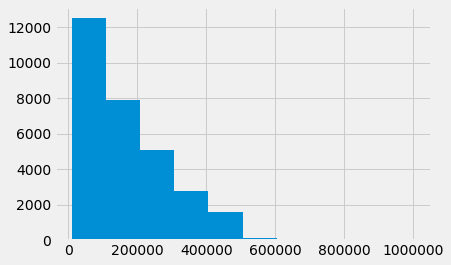

In [28]:
plt.hist(credit['LIMIT_BAL'])
plt.show()

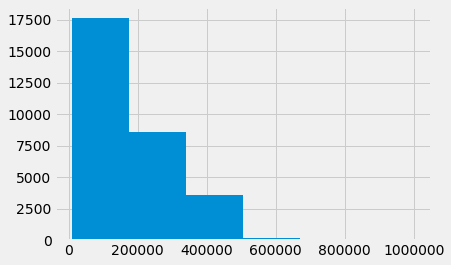

In [29]:
plt.hist(credit['LIMIT_BAL'], bins = 6)
plt.show()

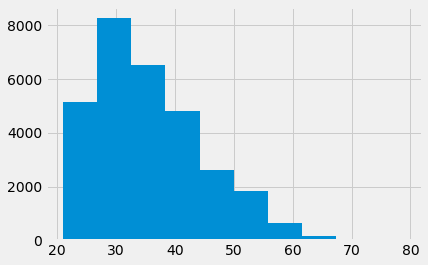

In [30]:
plt.hist(credit['AGE'], bins = 10)
plt.show()

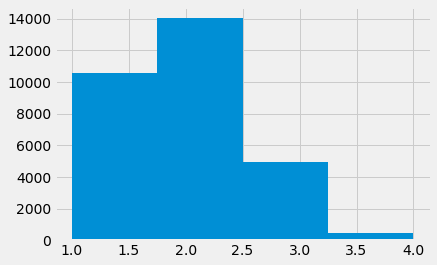

In [31]:
plt.hist(credit['EDUCATION'], bins = 4)
plt.show()

In [ ]:
#DO NOT USE- this code continues to cause Python to stop executing
# plt.plot(credit['LIMIT_BAL'])
# plt.show()

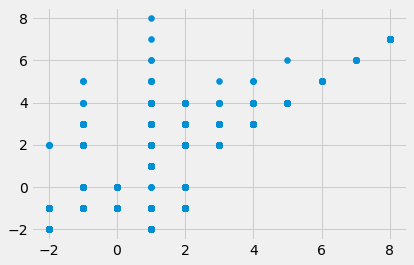

In [32]:
x = credit['PAY_1']
y = credit['PAY_2']
plt.scatter(x,y)
plt.show()

In [33]:
header = credit.dtypes.index
print(header)

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'depvar'],
      dtype='object')


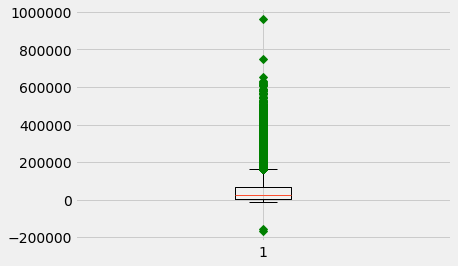

In [34]:
A = credit['BILL_AMT1']
plt.boxplot(A,0,'gD')
plt.show()

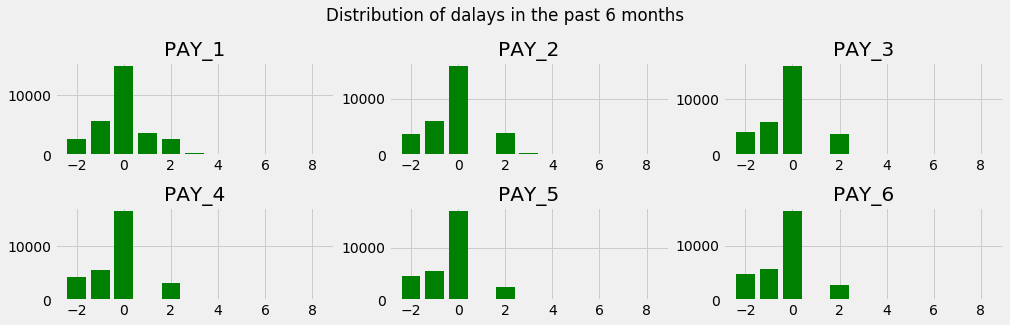

In [35]:
# pay status columns- Distribution over the past 6 months
pattern = re.compile("^PAY_[0-9]+$")
pay_status_columns = [ x for x in credit.columns if (pattern.match(x))]

fig, ax = plt.subplots(2,3)
fig.set_size_inches(15,5)
fig.suptitle('Distribution of dalays in the past 6 months')

for i in range(len(pay_status_columns)):
    row,col = int(i/3), i%3

    d  = credit[pay_status_columns[i]].value_counts()
    ax[row,col].bar(d.index, d, align='center', color='g')
    ax[row,col].set_title(pay_status_columns[i])

plt.tight_layout(pad=3.0, w_pad=0.5, h_pad=1.0)
plt.show()

#### plots above show that most people pay on time whereas some used no credit & some paid one month in advance; if defaulting, most were two months delayed

In [36]:
# look at credit over past few months; credit to be repaid is positive #
pattern = re.compile("^BILL_AMT[0-9]+$")
bill_columns = [ x for x in credit.columns if (pattern.match(x))]
credit[bill_columns].describe()

,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6
count,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000
mean,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400
std,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537
min,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000
25%,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000
50%,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000
75%,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000
max,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000


In [37]:
credit[bill_columns].head(10)

,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6
ID,,,,,,
1,3913,3102,689,0,0,0
2,2682,1725,2682,3272,3455,3261
3,29239,14027,13559,14331,14948,15549
4,46990,48233,49291,28314,28959,29547
5,8617,5670,35835,20940,19146,19131
6,64400,57069,57608,19394,19619,20024
7,367965,412023,445007,542653,483003,473944
8,11876,380,601,221,-159,567
9,11285,14096,12108,12211,11793,3719


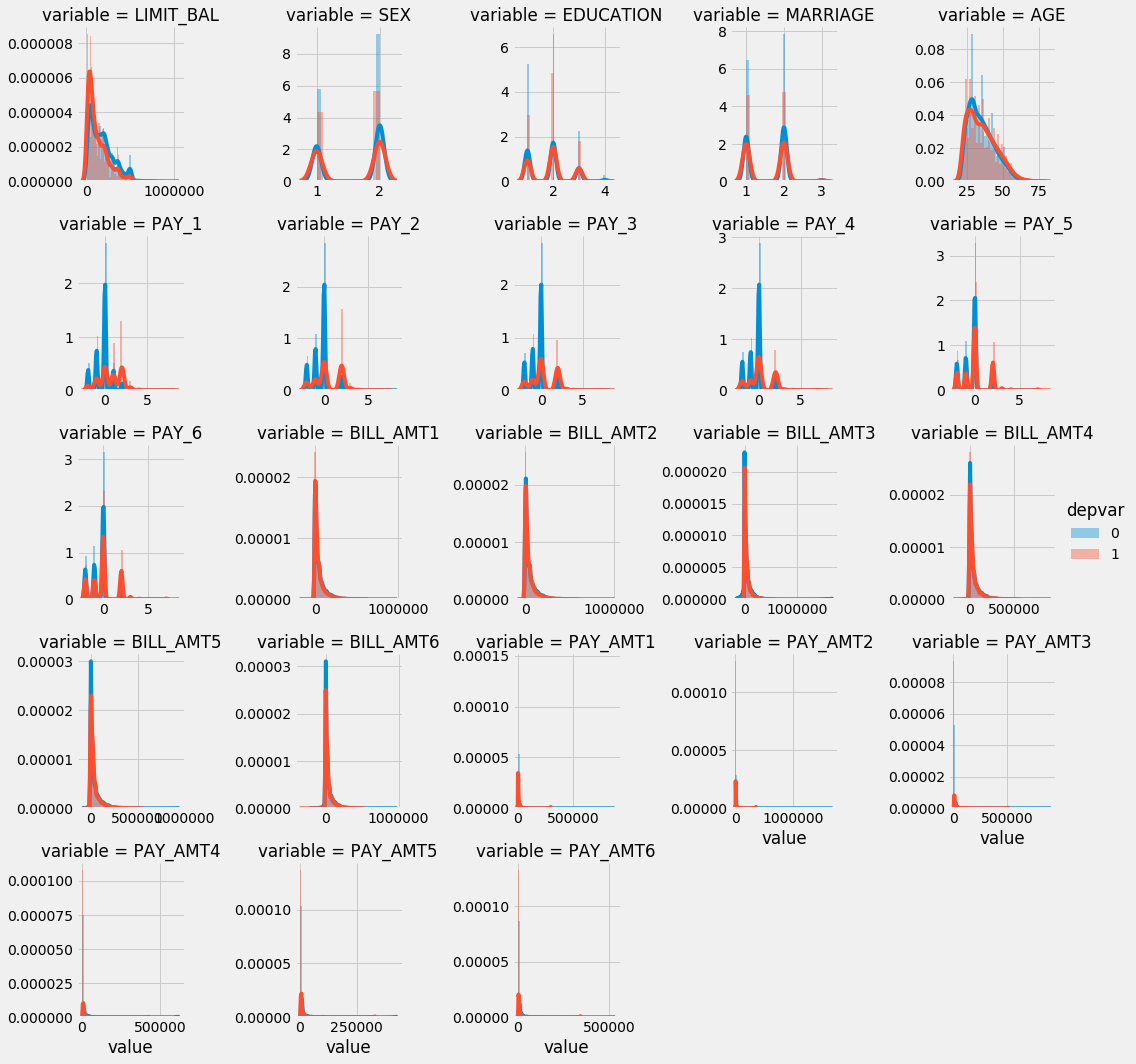

In [38]:
output = 'depvar'

# Look at characteristics of default/no default for each variable
cols = [ f for f in credit.columns if credit.dtypes[ f ] != "object"]
#cols.remove( "ID")
cols.remove(output)

f = pd.melt(credit, id_vars=output, value_vars=cols)
g = sns.FacetGrid(f, hue=output, col="variable", col_wrap=5, sharex=False, sharey=False )
g = g.map(sns.distplot, "value", kde=True).add_legend()

#### Observations
•	Defaults have a higher proportion of Lower LIMIT_BAL values
•	NonDefaults have a higher proportion of Females (Sex=2)
•	NonDefaults have a higher proportion of being More Educated (EDUCATION=1 or 2)
•	NonDefaults have a higher proportion of Singles (MARRIAGE=2)
•	Defaults drop as age increases 
•	NonDefaults have a MUCH higher proportion of zero or negative PAY_X variables (being current or ahead of payments may be associated with not defaulting in the following month). 

#### Change DepVar, Sex, Marriage, Education, Pay_ columns to categories; bin Age

In [82]:
#Convert sex, marriage, education, age and 
#the pay_* columns to categories
credit['SEX'] = credit['SEX'].astype('category').cat.rename_categories(['M', 'F'])
credit['MARRIAGE'] = credit['MARRIAGE'].astype('category').cat.rename_categories(['married','single','divorce/other'])
credit.MARRIAGE.dtype == 'category'
credit.SEX.dtype == 'category'

True

In [83]:
pattern = re.compile("^PAY_[0-9]+$")
pay_status_columns = [ x for x in credit.columns if (pattern.match(x))]
for i in pay_status_columns:
    credit[i] = credit[i].astype('category')
credit['depvar'] = credit['depvar'].astype('category')

In [84]:
credit['AGE'] = pd.cut(credit['AGE'], range(0, 100, 10), right=False)

In [85]:
default = credit[credit['depvar']==1]
not_default = credit[credit['depvar']==0]

In [43]:
#Total number of defaulters
len(default)

6636

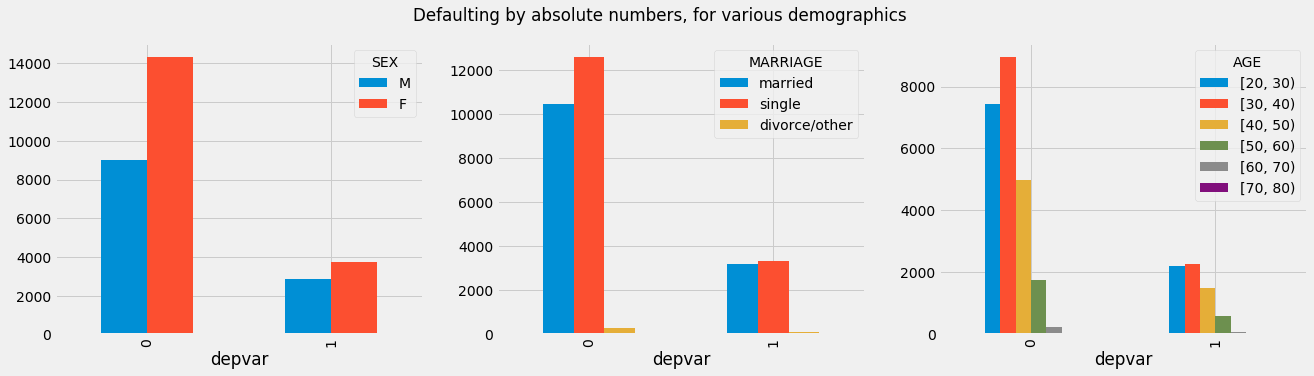

In [44]:
#absolute statistics
fig, ax = plt.subplots(1,3)
fig.set_size_inches(20,5)
fig.suptitle('Defaulting by absolute numbers, for various demographics')

d = credit.groupby(['depvar', 'SEX']).size()
p = d.unstack(level=1).plot(kind='bar', ax=ax[0])

d = credit.groupby(['depvar', 'MARRIAGE']).size()
p = d.unstack(level=1).plot(kind='bar', ax=ax[1])

d = credit.groupby(['depvar', 'AGE']).size()
p = d.unstack(level=1).plot(kind='bar', ax=ax[2])

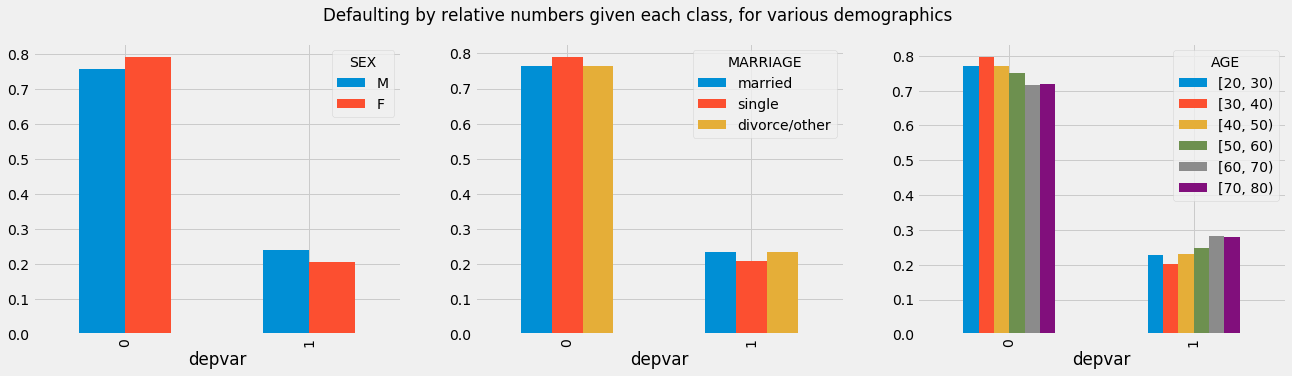

In [45]:
#stats relative to population
fig, ax = plt.subplots(1,3)
fig.set_size_inches(20,5)
fig.suptitle('Defaulting by relative numbers given each class, for various demographics')

d = credit.groupby(['depvar', 'SEX']).size().unstack(level=1)
d = d / d.sum()
p = d.plot(kind='bar', ax=ax[0])

d = credit.groupby(['depvar', 'MARRIAGE']).size().unstack(level=1)
d = d / d.sum()
p = d.plot(kind='bar', ax=ax[1])

d = credit.groupby(['depvar', 'AGE']).size().unstack(level=1)
d = d / d.sum()
p = d.plot(kind='bar', ax=ax[2])

#### Based on relative stats- males; married/divorced people and 50+ aged people are slightly more represented in defaulting than females; single people (inverse for non-default); 20-50 age group

defaulting accounts are 22.12% out of 30000 observations


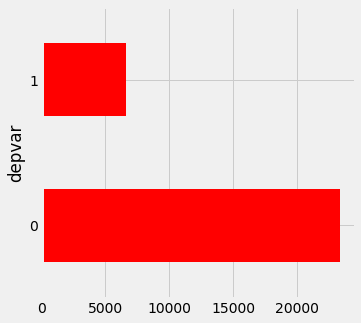

In [46]:
fig = plt.figure()
fig.set_size_inches(5,5)
d = credit.groupby(['depvar']).size()

print("defaulting accounts are {}% out of {} observations".format(100* d[1]/(d[1]+d[0]), d[1]+d[0]))
p = d.plot(kind='barh', color='red')

### Look at Correlations based on the observations above

In [47]:
corrMat = credit.corr()
print(corrMat)

           LIMIT_BAL  EDUCATION  BILL_AMT1  BILL_AMT2  BILL_AMT3  BILL_AMT4  \
LIMIT_BAL   1.000000  -0.231088   0.285430   0.278314   0.283236   0.293988   
EDUCATION  -0.231088   1.000000   0.016597   0.011980   0.006714  -0.006131   
BILL_AMT1   0.285430   0.016597   1.000000   0.951484   0.892279   0.860272   
BILL_AMT2   0.278314   0.011980   0.951484   1.000000   0.928326   0.892482   
BILL_AMT3   0.283236   0.006714   0.892279   0.928326   1.000000   0.923969   
BILL_AMT4   0.293988  -0.006131   0.860272   0.892482   0.923969   1.000000   
BILL_AMT5   0.295562  -0.012439   0.829779   0.859778   0.883910   0.940134   
BILL_AMT6   0.290389  -0.012646   0.802650   0.831594   0.853320   0.900941   
PAY_AMT1    0.195236  -0.041088   0.140277   0.280365   0.244335   0.233012   
PAY_AMT2    0.178408  -0.032793   0.099355   0.100851   0.316936   0.207564   
PAY_AMT3    0.210167  -0.044293   0.156887   0.150718   0.130011   0.300023   
PAY_AMT4    0.203242  -0.040949   0.158303   0.14739

In [48]:
def ChiSquaredTestOfIndependence(credit, inputVar, Outcome_Category ):
    # Useful to have this wrapped in a function
    # The ChiSquaredTest of Independence - 
    # has a null hypothesis: the OutcomeCategory is independent of the inputVar
    # So we create a test-statistic which is a measure of the difference between 
    # "expected" i.e. what we WOULD observe if the OutcomeCategory WAS independent of the inputVar
    # "observed" i.e. what the data actually shows
    # the p-value returned is the probability of seeing this test-statistic if the null-hypothesis is true
    Outcome_Category_Table = credit.groupby( Outcome_Category )[ Outcome_Category ].count().values
    Outcome_Category_Ratios = Outcome_Category_Table / sum( Outcome_Category_Table )
    possibleVals = credit[inputVar].unique()
    observed = []
    expected = []
    for possible in possibleVals:
        countsInCategories = credit[ credit[ inputVar ] == possible ].groupby( Outcome_Category )[Outcome_Category].count().values
        if( len(countsInCategories) != len( Outcome_Category_Ratios ) ):
            print("Error! The class " + str( possible) +" of \'" + inputVar + "\' does not contain all values of \'" + Outcome_Category + "\'" )
            return
        elif( min(countsInCategories) < 5 ):
            print("Chi Squared Test needs at least 5 observations in each cell!")
            print( inputVar + "=" + str(possible) + " has insufficient data")
            print( countsInCategories )
            return
        else:
            observed.append( countsInCategories )   
            expected.append( Outcome_Category_Ratios * len( credit[credit[ inputVar ] == possible ]))
    observed = np.array( observed )
    expected = np.array( expected )
    chi_squared_stat = ((observed - expected)**2 / expected).sum().sum()
    degOfF = (observed.shape[0] - 1 ) *(observed.shape[1] - 1 ) 
    #crit = stats.chi2.ppf(q = 0.95,df = degOfF) 
    p_value = 1 - stats.chi2.cdf(x=chi_squared_stat, df=degOfF)
    print("Calculated test-statistic is %.2f" % chi_squared_stat )
    print("If " + Outcome_Category + " is indep of " + inputVar + ", this has prob %.2e of occurring" % p_value )
    #t_stat, p_val, doF, expArray = stats.chi2_contingency(observed= observed, correction=False)
    #print("Using built-in stats test: outputs")
    #print("test-statistic=%.2f, p-value=%.2f, degsOfFreedom=%d" % ( t_stat, p_val, doF ) )

In [49]:
ChiSquaredTestOfIndependence( credit, "SEX", output )

Calculated test-statistic is 47.91
If depvar is indep of SEX, this has prob 4.47e-12 of occurring


In [50]:
ChiSquaredTestOfIndependence( credit, "EDUCATION", output )

Calculated test-statistic is 160.41
If depvar is indep of EDUCATION, this has prob 0.00e+00 of occurring


In [51]:
ChiSquaredTestOfIndependence( credit, "MARRIAGE", output ) 

Calculated test-statistic is 28.13
If depvar is indep of MARRIAGE, this has prob 7.79e-07 of occurring


#### Based on Chi^2 Test of Ind, default is not independent of Sex, Education, or Marriage.

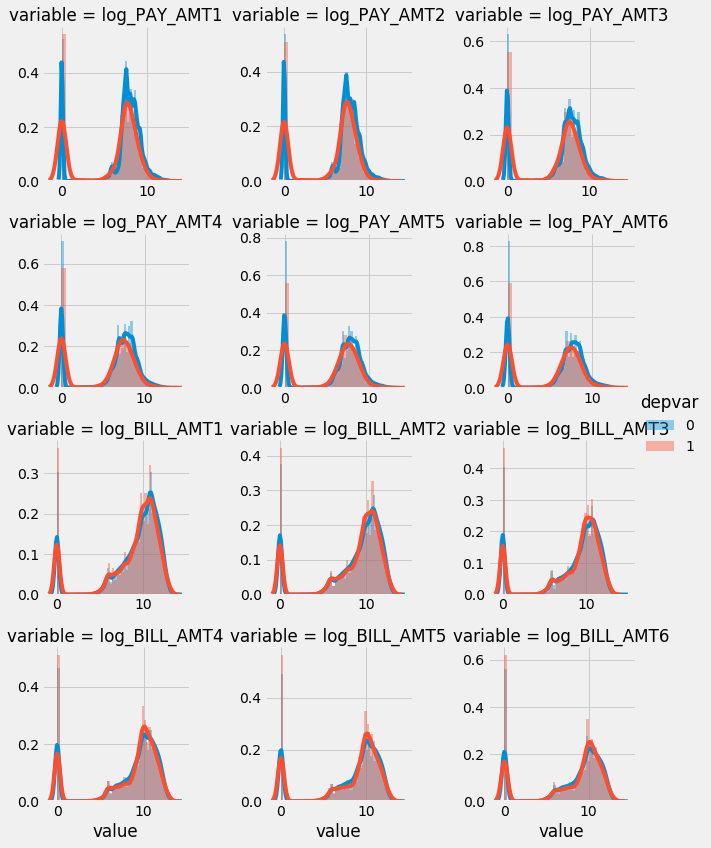

In [174]:
credit["log_PAY_AMT1"]  = credit["PAY_AMT1"].apply( lambda x: np.log1p(x) if (x>0) else 0)
logged.append("log_PAY_AMT1")

credit["log_PAY_AMT2"]  = credit["PAY_AMT2"].apply( lambda x: np.log1p(x) if (x>0) else 0)
logged.append("log_PAY_AMT2")

credit["log_PAY_AMT3"]  = credit["PAY_AMT3"].apply( lambda x: np.log1p(x) if (x>0) else 0)
logged.append("log_PAY_AMT3")

credit["log_PAY_AMT4"]  = credit["PAY_AMT4"].apply( lambda x: np.log1p(x) if (x>0) else 0)
logged.append("log_PAY_AMT4")

credit["log_PAY_AMT5"]  = credit["PAY_AMT5"].apply( lambda x: np.log1p(x) if (x>0) else 0)
logged.append("log_PAY_AMT5")

credit["log_PAY_AMT6"]  = credit["PAY_AMT6"].apply( lambda x: np.log1p(x) if (x>0) else 0)
logged.append("log_PAY_AMT6")
credit["log_BILL_AMT1"] = credit["BILL_AMT1"].apply( lambda x: np.log1p(x) if (x>0) else 0)
logged.append("log_BILL_AMT1")

credit["log_BILL_AMT2"] = credit["BILL_AMT2"].apply( lambda x: np.log1p(x) if (x>0) else 0)
logged.append("log_BILL_AMT2")

credit["log_BILL_AMT3"] = credit["BILL_AMT3"].apply( lambda x: np.log1p(x) if (x>0) else 0)
logged.append("log_BILL_AMT3")

credit["log_BILL_AMT4"] = credit["BILL_AMT4"].apply( lambda x: np.log1p(x) if (x>0) else 0)
logged.append("log_BILL_AMT4")

credit["log_BILL_AMT5"] = credit["BILL_AMT5"].apply( lambda x: np.log1p(x) if (x>0) else 0)
logged.append("log_BILL_AMT5")

credit["log_BILL_AMT6"] = credit["BILL_AMT6"].apply( lambda x: np.log1p(x) if (x>0) else 0)
logged.append("log_BILL_AMT6")

f = pd.melt(credit, id_vars=output, value_vars=logged)
g = sns.FacetGrid(f, hue=output, col="variable", col_wrap=3, sharex=False, sharey=False)
g = g.map(sns.distplot, "value", kde=True).add_legend()

###### Based on above it appears the higher Log Pay_AMT is associated w/ slightly less default

<function matplotlib.pyplot.show(*args, **kw)>

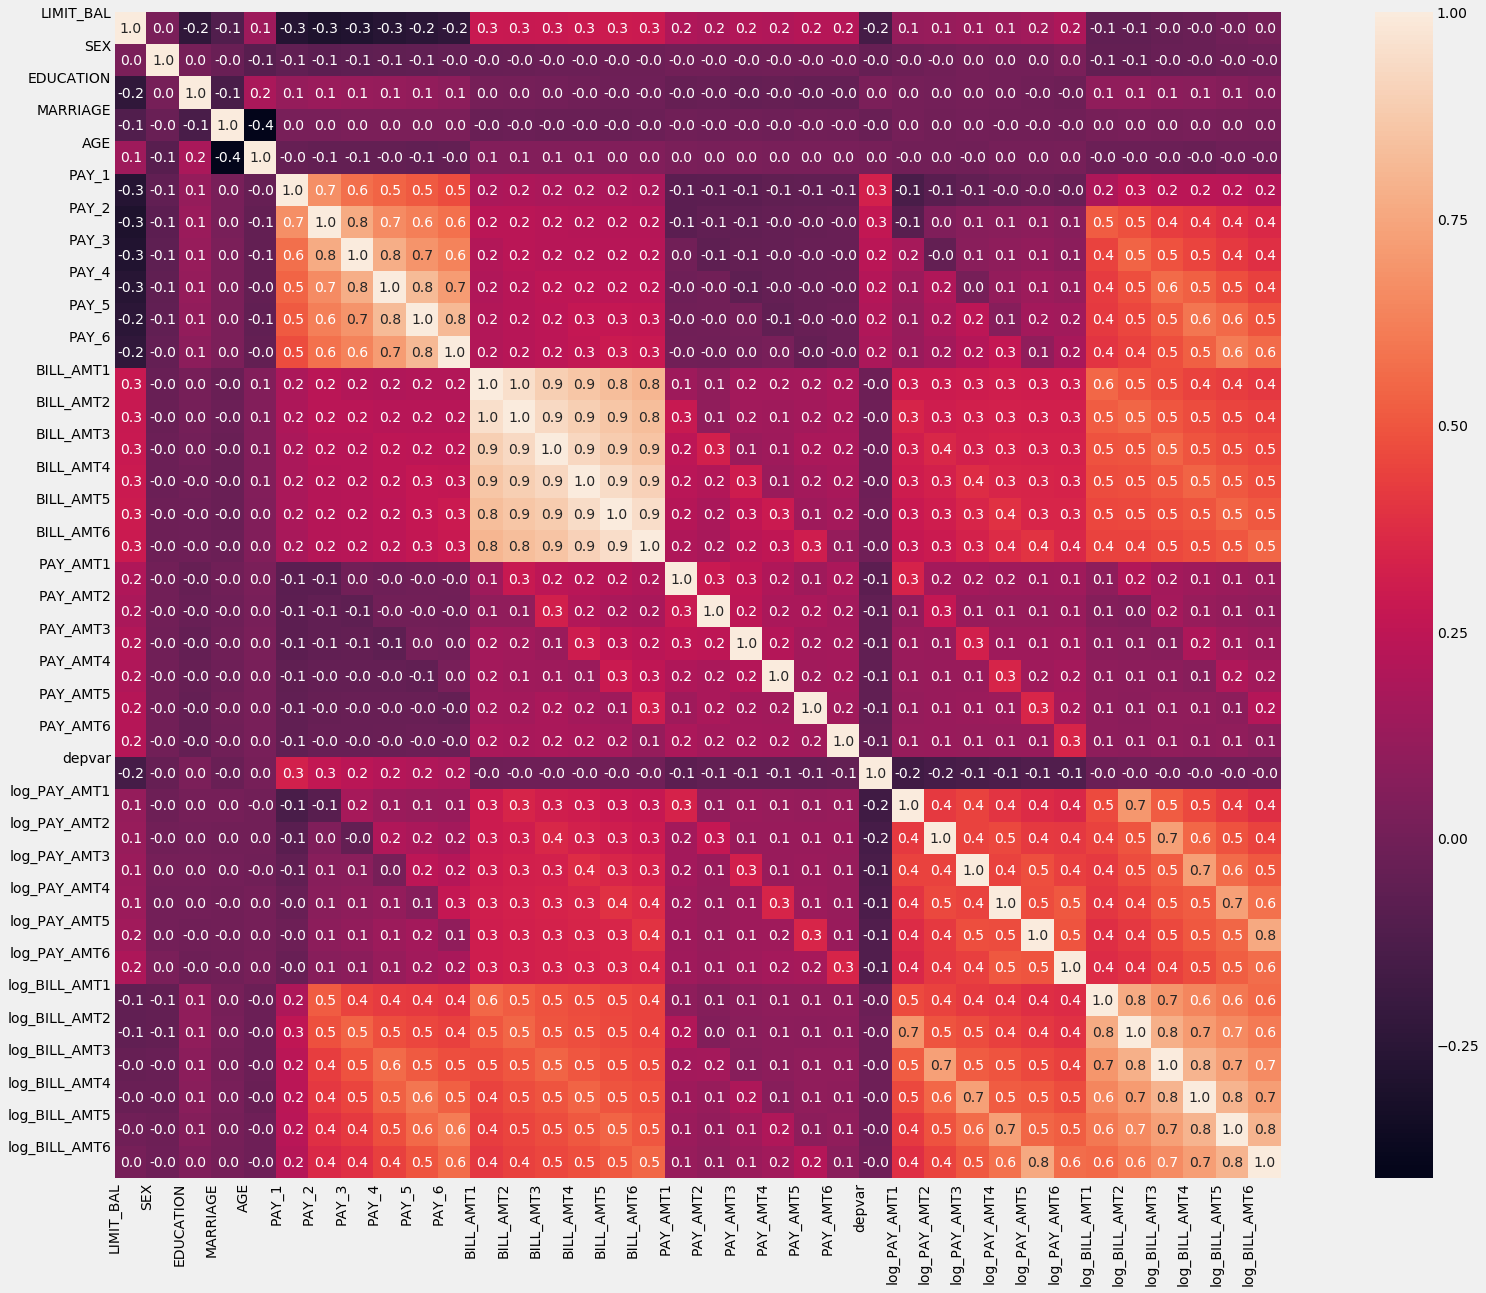

In [176]:
#Check correlations w/ output variable
#Create correlation df
corr = credit.corr()
#Plot figsize
plt.subplots(figsize=(30,20))
#Generate Heat Map, allow annotations, & place floats in map
sns.heatmap( corr, square=True, annot=True, fmt=".1f" )
plt.xticks(range(len(corr.columns)), corr.columns);
plt.yticks(range(len(corr.columns)), corr.columns)
plt.show

In [52]:
#Column Names
credit.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'depvar'],
      dtype='object')

<function matplotlib.pyplot.show(*args, **kw)>

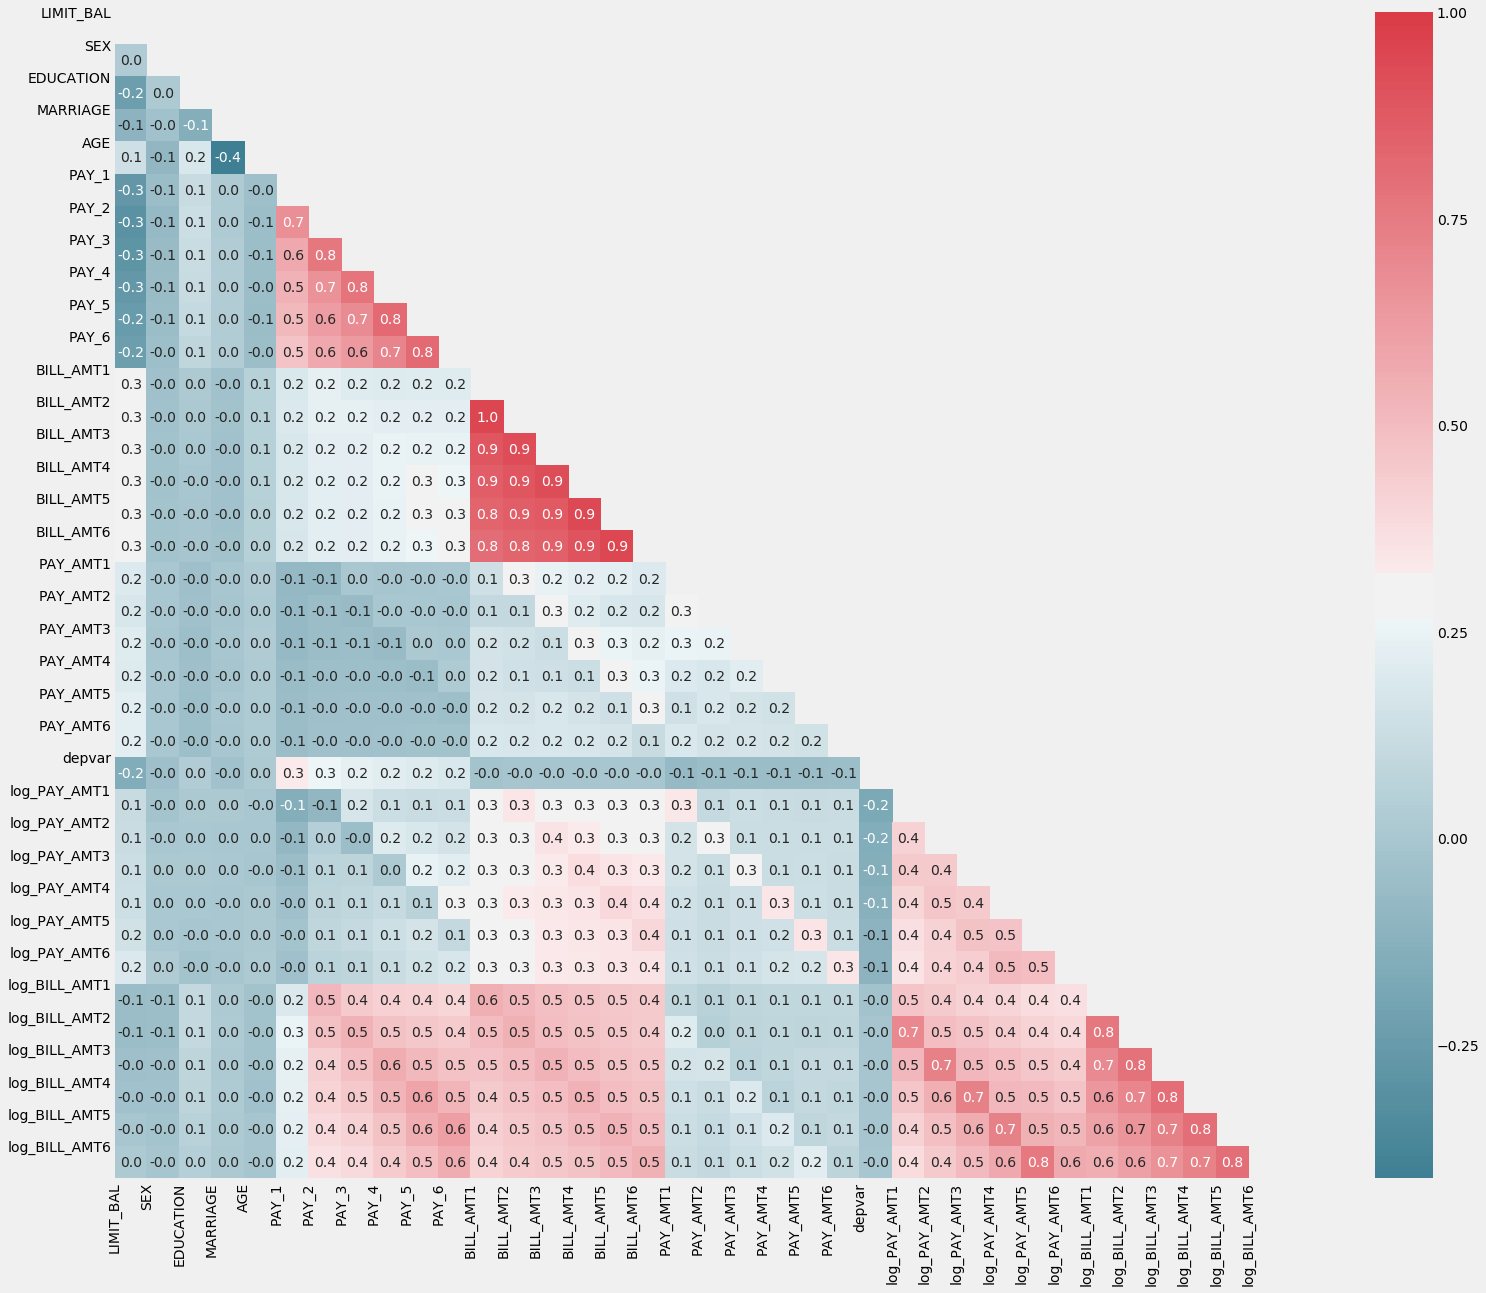

In [188]:
#Create correlation df
corr = credit.corr()
#Plot figsize
plt.subplots(figsize=(30,20))

#Generate Custom diverging Color Map
cmap=sns.diverging_palette(220, 10, as_cmap=True)

#Generate a mask for upper triangle
mask = np.zeros_like(corr, dtype= np.bool)
mask[np.triu_indices_from(mask)] = True

#Generate Heat Map, allow annotations, & place floats in map
sns.heatmap( corr, mask=mask, cmap=cmap, square=True, annot=True, fmt=".1f" )
plt.xticks(range(len(corr.columns)), corr.columns);
plt.yticks(range(len(corr.columns)), corr.columns)
plt.show

In [103]:
#Check for covariance
covMat = credit.cov()
print(covMat)

              LIMIT_BAL          SEX     EDUCATION     MARRIAGE  \
LIMIT_BAL  1.683446e+10  1571.050630 -22322.227579 -7510.091214   
SEX        1.571051e+03     0.239247      0.004962    -0.007274   
EDUCATION -2.232223e+04     0.004962      0.554272    -0.053102   
MARRIAGE  -7.510091e+03    -0.007274     -0.053102     0.271863   
AGE        1.730767e+05    -0.409726      1.251988    -1.980186   
PAY_1     -3.954593e+04    -0.031685      0.094202     0.010873   
PAY_2     -4.603765e+04    -0.041442      0.115604     0.014744   
PAY_3     -4.443225e+04    -0.038694      0.109088     0.020218   
PAY_4     -4.057181e+04    -0.034411      0.101430     0.019404   
PAY_5     -3.667056e+04    -0.030521      0.087814     0.020312   
PAY_6     -3.509308e+04    -0.024754      0.076186     0.019888   
BILL_AMT1  2.727020e+09 -1211.694332    909.885257 -1068.602920   
BILL_AMT2  2.570130e+09 -1085.595467    634.798683  -938.679611   
BILL_AMT3  2.548533e+09  -833.207432    346.636738 -1051.58691

In [91]:
credit.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'depvar'],
      dtype='object')

In [105]:
rel = credit.iloc[:,[23, 0,5,6,11, 12, 17, 18]]
rel.cov()

,depvar,LIMIT_BAL,PAY_1,PAY_2,BILL_AMT1,BILL_AMT2,PAY_AMT1,PAY_AMT2
depvar,0.172276,-8.267552e+03,0.151499,0.130960,-6.003941e+02,-4.192891e+02,-5.013746e+02,-5.602107e+02
LIMIT_BAL,-8267.551759,1.683446e+10,-39545.930009,-46037.648360,2.727020e+09,2.570130e+09,4.195711e+08,5.333504e+08
PAY_1,0.151499,-3.954593e+04,1.262930,0.904330,1.548030e+04,1.518592e+04,-1.475495e+03,-1.815138e+03
PAY_2,0.130960,-4.603765e+04,0.904330,1.433254,2.070661e+04,2.004583e+04,-1.600241e+03,-1.627192e+03
BILL_AMT1,-600.394108,2.727020e+09,15480.304170,20706.614217,5.422240e+09,4.986670e+09,1.710894e+08,1.685692e+08
BILL_AMT2,-419.289137,2.570130e+09,15185.916919,20045.829482,4.986670e+09,5.065705e+09,3.305146e+08,1.653859e+08
PAY_AMT1,-501.374552,4.195711e+08,-1475.495089,-1600.240756,1.710894e+08,3.305146e+08,2.743423e+08,1.089849e+08
PAY_AMT2,-560.210740,5.333504e+08,-1815.138407,-1627.192336,1.685692e+08,1.653859e+08,1.089849e+08,5.308817e+08


In [109]:
dos = credit.iloc[:,[23, 5,6,7, 8, 9, 10]]
dos.cov()

,depvar,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
depvar,0.172276,0.151499,0.130960,0.116867,0.105115,0.096020,0.089194
PAY_1,0.151499,1.262930,0.904330,0.772384,0.707972,0.648743,0.613292
PAY_2,0.130960,0.904330,1.433254,1.098371,0.926680,0.844886,0.792320
PAY_3,0.116867,0.772384,1.098371,1.432492,1.087761,0.931455,0.870815
PAY_4,0.105115,0.707972,0.926680,1.087761,1.366885,1.086161,0.963263
PAY_5,0.096020,0.648743,0.844886,0.931455,1.086161,1.284114,1.064545
PAY_6,0.089194,0.613292,0.792320,0.870815,0.963263,1.064545,1.322472


#### covariance between depvar and repayment status decreases the further back from most recent repayment

In [110]:
tres = credit.iloc[:,[23, 11,12,13, 14, 15, 16]]
tres.cov()

,depvar,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6
depvar,0.172276,-6.003941e+02,-4.192891e+02,-4.051537e+02,-2.711999e+02,-1.705974e+02,-1.327963e+02
BILL_AMT1,-600.394108,5.422240e+09,4.986670e+09,4.556511e+09,4.075286e+09,3.714795e+09,3.519876e+09
BILL_AMT2,-419.289137,4.986670e+09,5.065705e+09,4.582086e+09,4.086508e+09,3.720401e+09,3.524868e+09
BILL_AMT3,-405.153680,4.556511e+09,4.582086e+09,4.809338e+09,4.122238e+09,3.726780e+09,3.524247e+09
BILL_AMT4,-271.199885,4.075286e+09,4.086508e+09,4.122238e+09,4.138716e+09,3.677105e+09,3.451762e+09
BILL_AMT5,-170.597447,3.714795e+09,3.720401e+09,3.726780e+09,3.677105e+09,3.696294e+09,3.425914e+09
BILL_AMT6,-132.796294,3.519876e+09,3.524868e+09,3.524247e+09,3.451762e+09,3.425914e+09,3.546692e+09


#### covariance between depvar & bill amt increases with each billing month

In [111]:
quatro =  credit.iloc[:,[23, 17,18,19, 20, 21, 22]]
quatro.cov()

,depvar,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
depvar,0.172276,-5.013746e+02,-5.602107e+02,-4.110763e+02,-3.695159e+02,-3.495625e+02,-3.924264e+02
PAY_AMT1,-501.374552,2.743423e+08,1.089849e+08,7.354626e+07,5.178189e+07,3.756893e+07,5.469033e+07
PAY_AMT2,-560.210740,1.089849e+08,5.308817e+08,9.929841e+07,6.501168e+07,6.368414e+07,6.456816e+07
PAY_AMT3,-411.076284,7.354626e+07,9.929841e+07,3.100051e+08,5.966970e+07,4.282921e+07,5.093879e+07
PAY_AMT4,-369.515887,5.178189e+07,6.501168e+07,5.966970e+07,2.454286e+08,3.634098e+07,4.395747e+07
PAY_AMT5,-349.562530,3.756893e+07,6.368414e+07,4.282921e+07,3.634098e+07,2.334266e+08,4.207110e+07
PAY_AMT6,-392.426415,5.469033e+07,6.456816e+07,5.093879e+07,4.395747e+07,4.207110e+07,3.160383e+08


#### covariance between depvar & pay amt is negative